## Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import autokeras as ak

from Model_Parent import *
from Model_Parent_2 import *

2022-04-02 02:11:20.545677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-02 02:11:20.545748: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/winequality-white_fixed.csv", index_col=0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Checking Data

<AxesSubplot:>

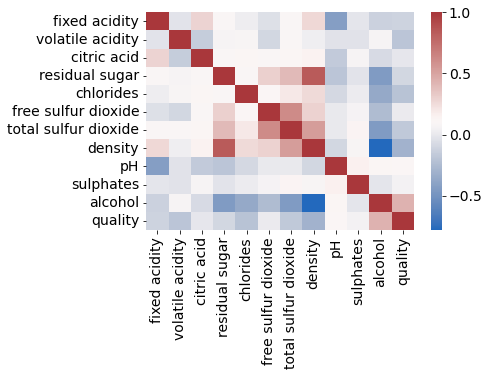

In [3]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [4]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667


## Breaking Data in X and y

In [5]:
X = df.iloc[:,:-1]

In [6]:
y = df.iloc[:,-1]

# Generating Models

In [6]:
# Using AutoKeras output to help us tune our parameters
# Can adjust hyperpameters, activation functions, and layer stucture based on our findings

auto_tune = ak.StructuredDataRegressor(max_trials=10, 
                                       overwrite=True,
                                       loss='mean_squared_error',
                                       output_dim=1,
                                       project_name='auto_keras'
                                       )

X_train, X_test, y_train, y_test = train_test_split(X, y)

auto_tune.fit(X_train, y_train, validation_split = 0.15, epochs = 10)
y_hat = auto_tune.predict(X_test)
print(auto_tune.evaluate(X_test, y_test))

auto_tune_mod = auto_tune.export_model()
print(auto_tune_mod.summary())


Trial 10 Complete [00h 00m 07s]
val_loss: 0.040519386529922485

Best val_loss So Far: 0.01709730364382267
Total elapsed time: 00h 01m 29s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
115/115 [==============================] - 1s 2ms/step - loss: 0.1207 - mean_squared_error: 0.1207
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0539 - mean_squared_error: 0.0539
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 9/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 10/1

2022-04-02 01:30:04.577863: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./auto_keras/best_model/assets
39/39 [==============================] - 0s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168
[0.016836633905768394, 0.016836633905768394]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 11)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                   

In [7]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 50

# Defining batch size
bs = 32

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [10]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [11]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0474
Epoch 2/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 3/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 6/50
123/123 [=============================

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        

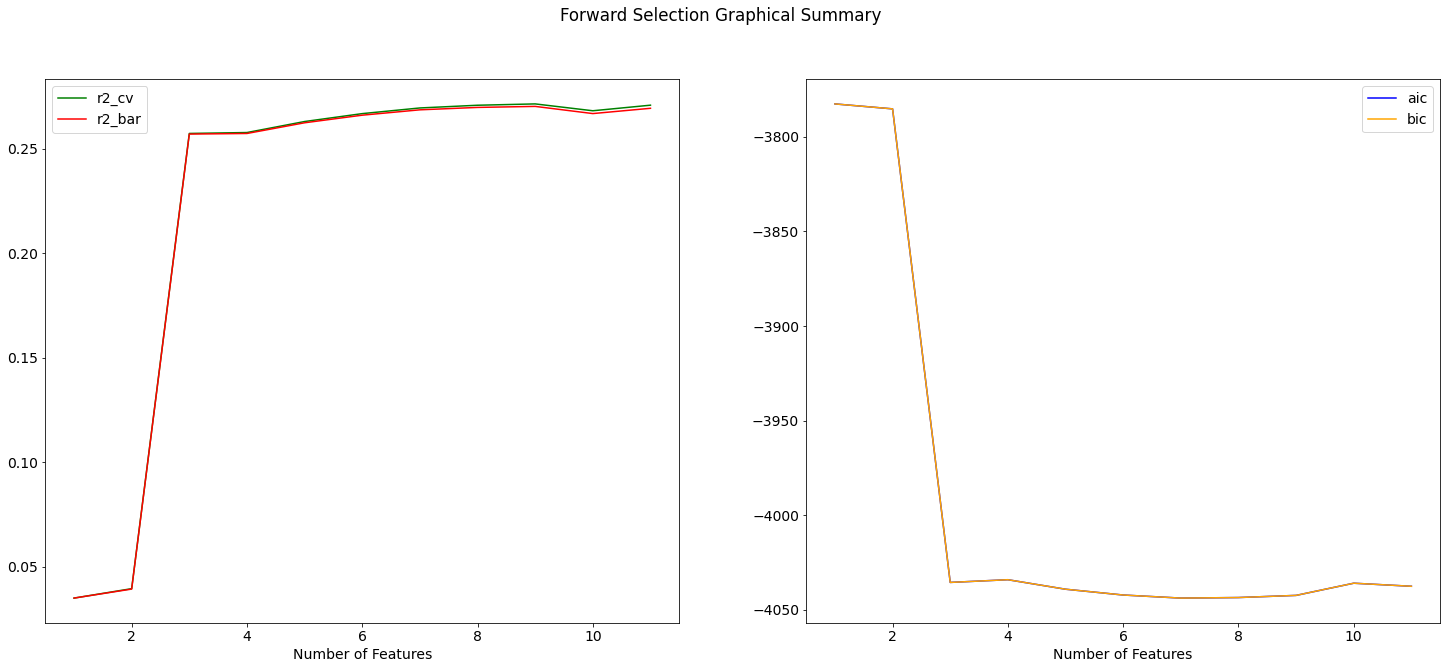

In [12]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [13]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [14]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 11)                132       
                                                                 
 dense_125 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 6/50
123/123 [==========================

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 11)                132       
                                                                 
 dense_135 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                       

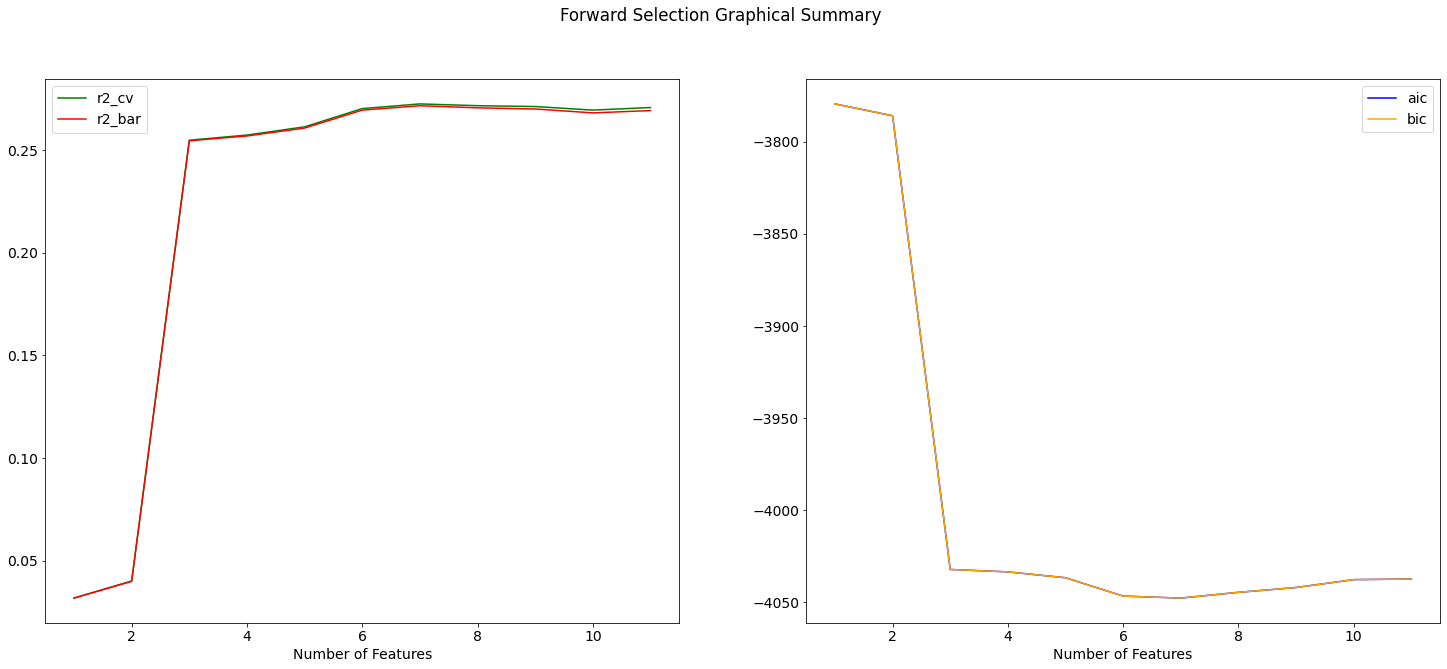

In [15]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [11]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'relu'

In [17]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_246 (Dense)           (None, 11)                132       
                                                                 
 dense_247 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 0s 820us/step - loss: 0.0459
Epoch 2/50
123/123 [==============================] - 0s 906us/step - loss: 0.0221
Epoch 3/50
123/123 [==============================] - 0s 803us/step - loss: 0.0188
Epoch 4/50
123/123 [==============================] - 0s 815us/step - loss: 0.0177
Epoch 5/50
123/123 [==============================] - 0s 887us/step - loss: 0.0171
Epoch 6/50
123/123 [===============

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        23

2022-04-01 23:55:25.561792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-01 23:55:25.561864: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 23:55:25.561905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-04-01 23:55:25.562574: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


123/123 [==============================] - 0s 864us/step - loss: 0.2511
Epoch 2/50
123/123 [==============================] - 0s 890us/step - loss: 0.2511
Epoch 3/50
123/123 [==============================] - 0s 994us/step - loss: 0.2511
Epoch 4/50
123/123 [==============================] - 0s 794us/step - loss: 0.2511
Epoch 5/50
123/123 [==============================] - 0s 946us/step - loss: 0.2511
Epoch 6/50
123/123 [==============================] - 0s 944us/step - loss: 0.2511
Epoch 7/50
123/123 [==============================] - 0s 973us/step - loss: 0.2511
Epoch 8/50
123/123 [==============================] - 0s 877us/step - loss: 0.2511
Epoch 9/50
123/123 [==============================] - 0s 847us/step - loss: 0.2511
Epoch 10/50
123/123 [==============================] - 0s 1ms/step - loss: 0.2511
Epoch 11/50
123/123 [==============================] - 0s 831us/step - loss: 0.2511
Epoch 12/50
123/123 [==============================] - 0s 901us/step - loss: 0.2511
Epoch 13/50
12

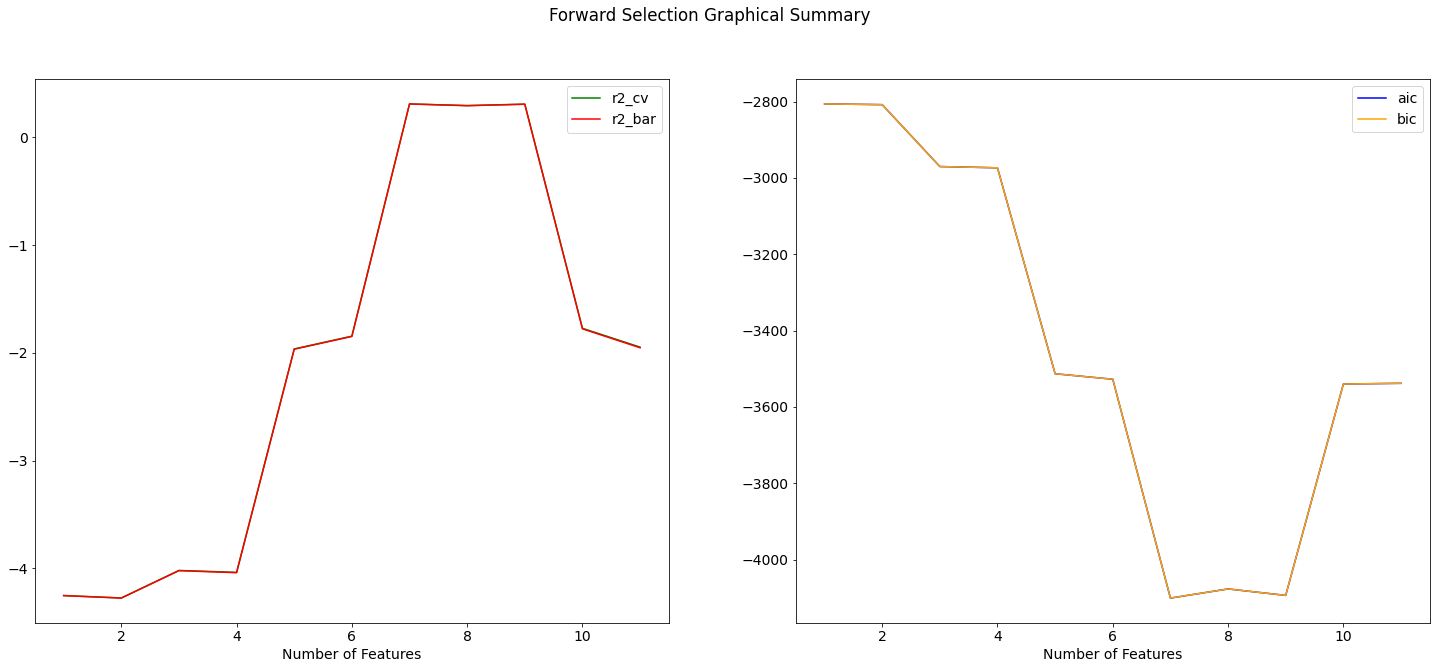

In [12]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [13]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [14]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 11)                132       
                                                                 
 dense_113 (Dense)           (None, 23)                276       
                                                                 
 dense_114 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 0s 862us/step - loss: 0.0227
Epoch 2/50
123/123 [==============================] - 0s 907us/step - loss: 0.0218
Epoch 3/50
123/123 [==============================] - 0s 881us/step - loss: 0.0215
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - lo

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 11)                132       
                                                                 
 dense_128 (Dense)           (None, 23)                276       
                                                                 
 dense_129 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:  

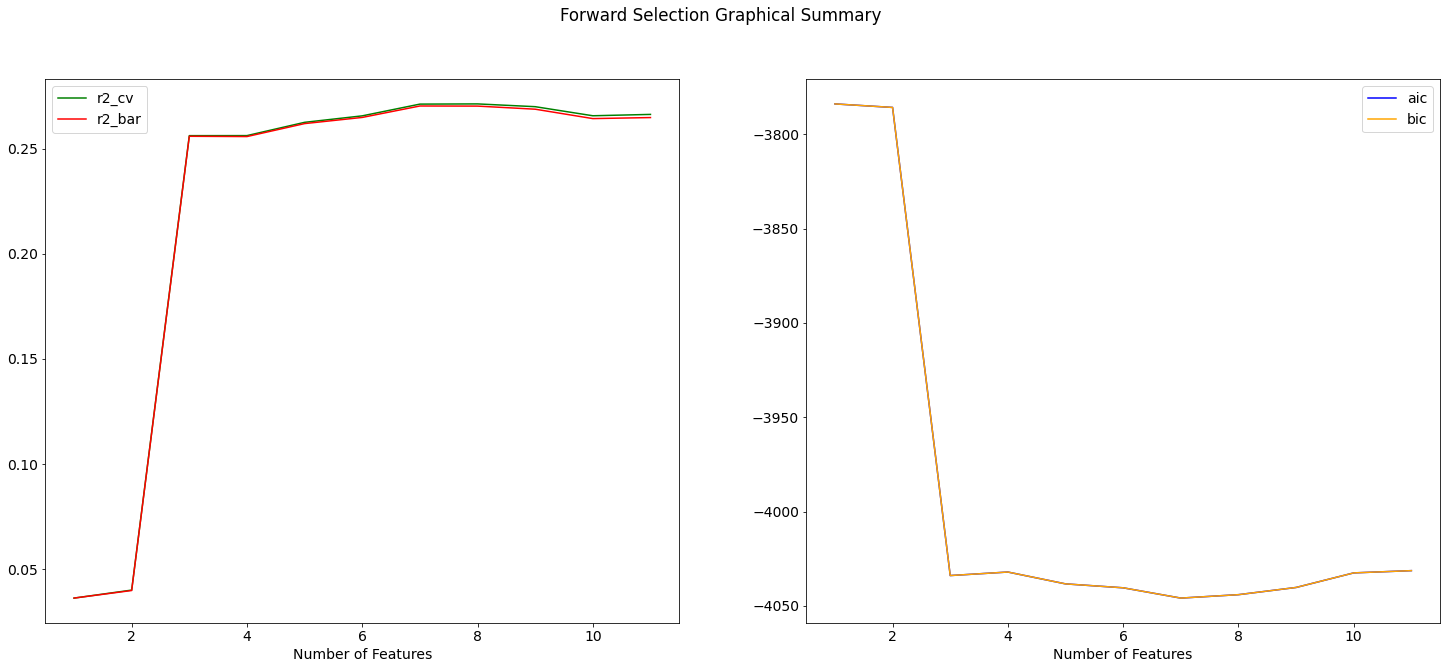

In [15]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [16]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [17]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_117"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_295 (Dense)           (None, 11)                132       
                                                                 
 dense_296 (Dense)           (None, 23)                276       
                                                                 
 dense_297 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 910us/step - loss: 0.0705
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 3/50
123/123 [==============================] - 0s 970us/step - loss: 0.0164
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - los

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_310 (Dense)           (None, 11)                132       
                                                                 
 dense_311 (Dense)           (None, 23)                276       
                                                                 
 dense_312 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic: 

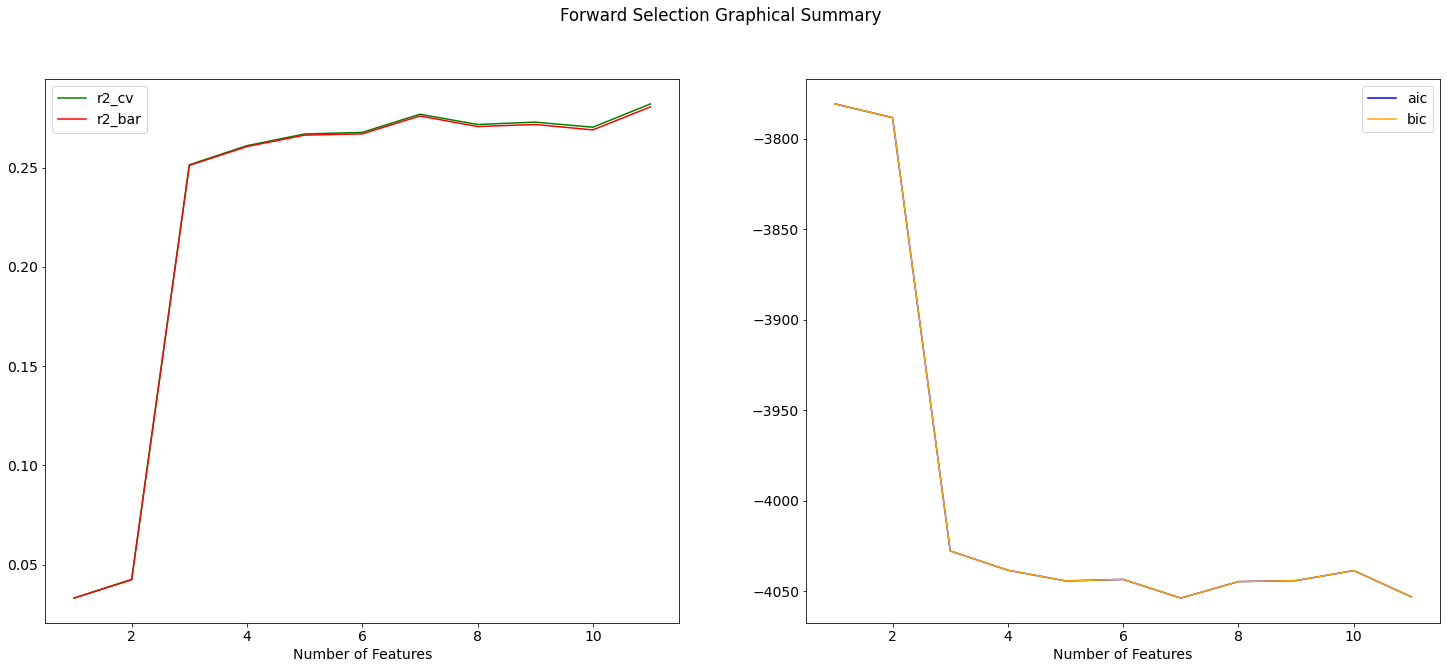

In [18]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [19]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'relu'

In [20]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_178"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_478 (Dense)           (None, 11)                132       
                                                                 
 dense_479 (Dense)           (None, 23)                276       
                                                                 
 dense_480 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 937us/step - loss: 0.0439
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss:

Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_493 (Dense)           (None, 11)                132       
                                                                 
 dense_494 (Dense)           (None, 23)                276       
                                                                 
 dense_495 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic: 

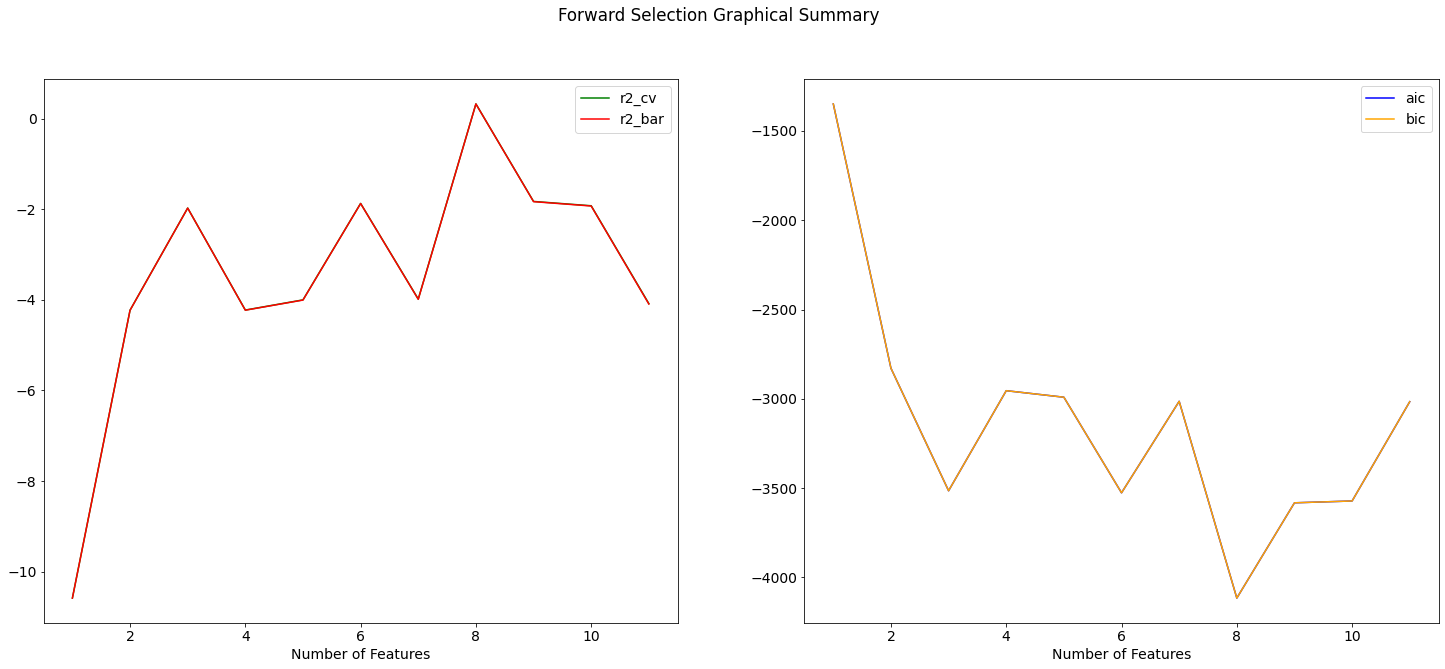

In [21]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 4 Layer Neural Networks

### Sigmoid Activation Function

In [8]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [23]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_239"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_661 (Dense)           (None, 11)                132       
                                                                 
 dense_662 (Dense)           (None, 23)                276       
                                                                 
 dense_663 (Dense)           (None, 12)                288       
                                                                 
 dense_664 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0225
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 3/50
123/123 [====

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 23)                276       
                                                                 
 dense_4 (Dense)             (None, 12)                288       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Mode

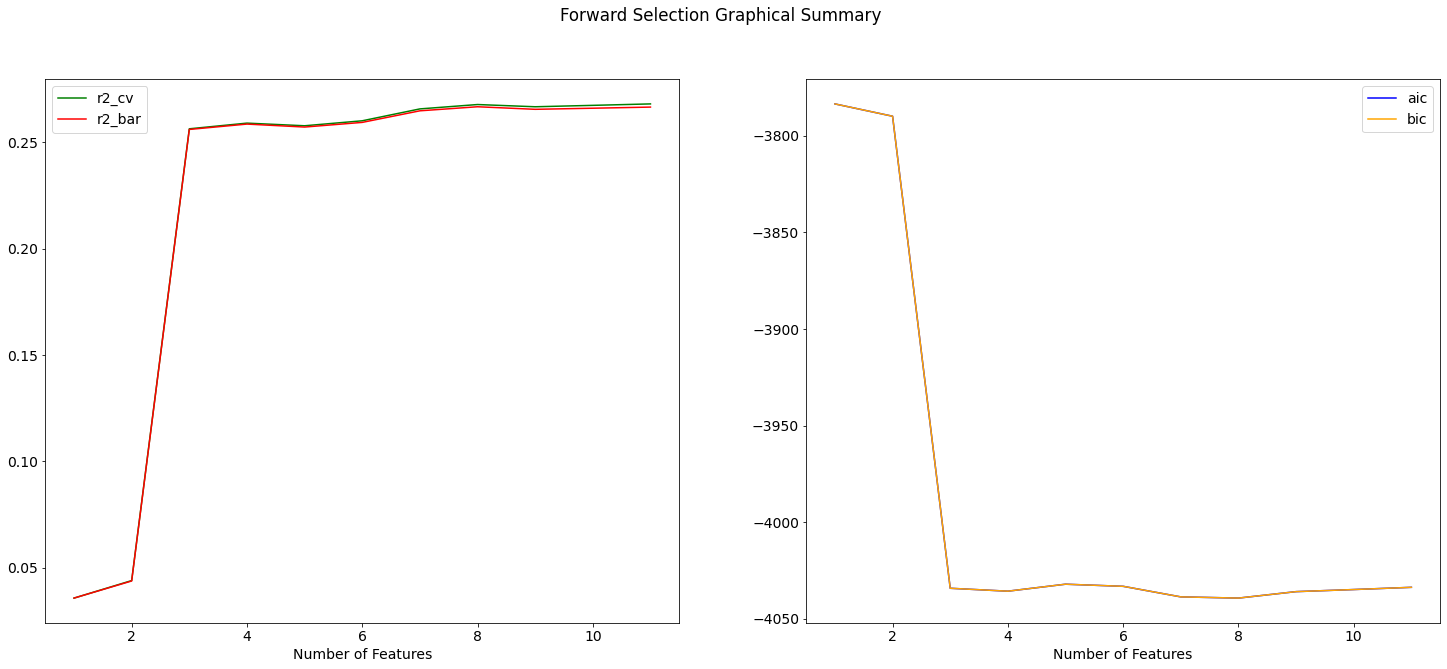

In [9]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [9]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [12]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_226 (Dense)           (None, 11)                132       
                                                                 
 dense_227 (Dense)           (None, 23)                276       
                                                                 
 dense_228 (Dense)           (None, 12)                288       
                                                                 
 dense_229 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0309
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 3/50
123/123 [=====

In [10]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 23)                276       
                                                                 
 dense_2 (Dense)             (None, 12)                288       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Mode

2022-04-02 02:13:18.128719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-02 02:13:18.128836: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 02:13:18.128908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost): /proc/driver/nvidia/version does not exist
2022-04-02 02:13:18.129788: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
123/123 [==============================] - 1s 1ms/step - loss: 0.0378
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 6/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 7/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 8/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 9/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 10/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 11/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 12/50
123/123 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 13/50
123/123 [====

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'relu'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)